### This code explains the implementation and the working of a logistic model

In [94]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [95]:
class LogisticRegression:
    def __init__(self, lr = 0.01, iterations = 100):
        self.lr = 0.01
        self.iterations = iterations
    
    def sigmoid(self, z):
        ans = 1/ (1 + np.exp(-z))
        return ans

    def fit(self, X, Y):
        n_samples, n_features = X.shape
        self.weight = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.iterations):
            z = np.dot(X, self.weight) + self.bias
            y_pred = self.sigmoid(z)

            dw = (1/n_samples) * np.dot(X.T, (y_pred - Y))
            db = (1/n_samples) * np.sum((y_pred - Y))

            self.weight -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        z = np.dot(X,self.weight) + self.bias
        y_pred = self.sigmoid(z)

        """Now we turn the probability values into a class"""

        y_class = [1 if i > 0.5 else 0 for i in y_pred]

        return y_class
    def predict_proba(self, X):
        z = np.dot(X, self.weight) + self.bias
        return self.sigmoid(z)
    
    def plot(self, X_train, Y_train, X_test, Y_test, feature_index):
        plt.figure(figsize=(10, 6))
    
        # Get predictions for all data
        X_combined = np.vstack((X_train, X_test))
        
        predictions = self.predict_proba(X_combined)

        
        
        # Plot training points
        plt.scatter(X_train[:, feature_index], 
                    predictions[:len(X_train)], 
                    color = 'blue')
        
        # Plot test points
        plt.scatter(X_test[:, feature_index], 
                    predictions[len(X_train):], 
                    color='red')
        
        # Plot decision threshold
        plt.axhline(y=0.5, color='black', linestyle='--', label='Decision threshold')
        
        
        plt.show()
    

def accuracy(y_pred, y_true):
    return np.sum(y_true == y_pred)/len(y_true);

In [96]:
bc = load_breast_cancer()
print(bc.feature_names)


['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [97]:
X,Y = bc.data, bc.target

In [98]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=50)

In [99]:
LR = LogisticRegression()
LR.fit(X_train, Y_train)

C:\Users\parth\AppData\Local\Temp\ipykernel_11480\3462889442.py:7: RuntimeWarning: overflow encountered in exp
  ans = 1/ (1 + np.exp(-z))


In [100]:
predicts = LR.predict(X_test)

C:\Users\parth\AppData\Local\Temp\ipykernel_11480\3462889442.py:7: RuntimeWarning: overflow encountered in exp
  ans = 1/ (1 + np.exp(-z))


In [101]:
accuracy(predicts, Y_test)

0.7894736842105263

C:\Users\parth\AppData\Local\Temp\ipykernel_11480\3462889442.py:7: RuntimeWarning: overflow encountered in exp
  ans = 1/ (1 + np.exp(-z))


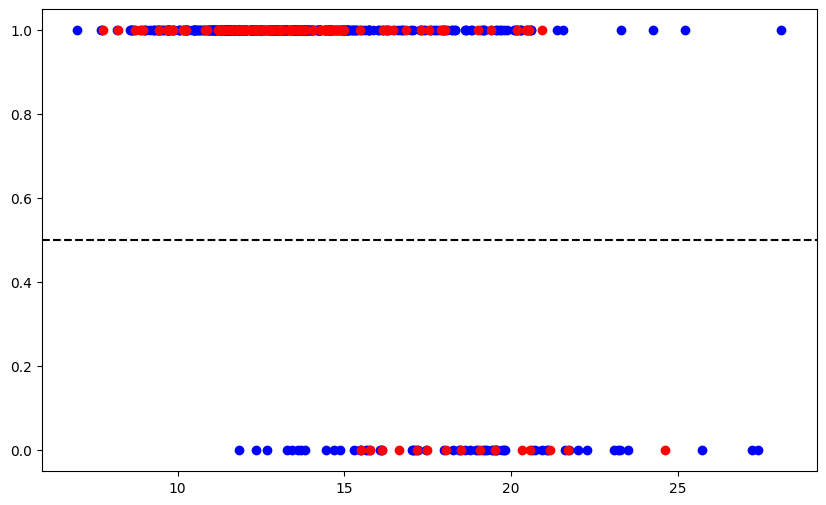

In [102]:
LR.plot(X_train, Y_train, X_test, Y_test, feature_index=0)

### Mathematical formulae used

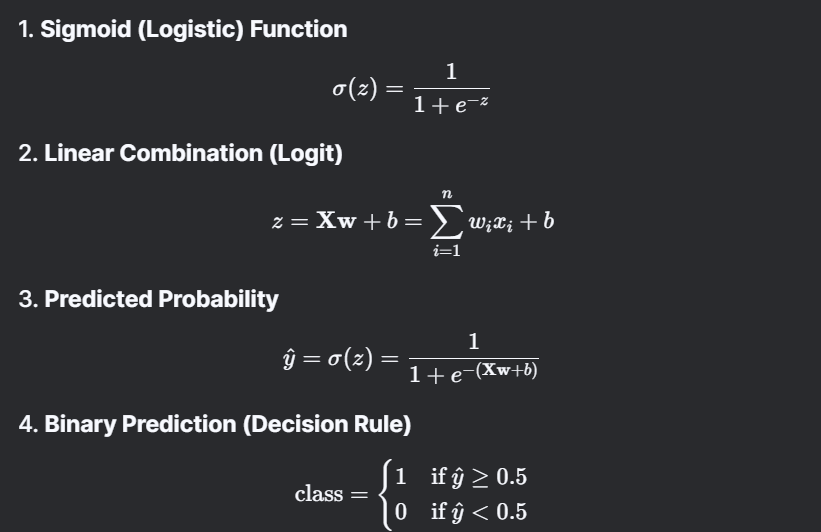
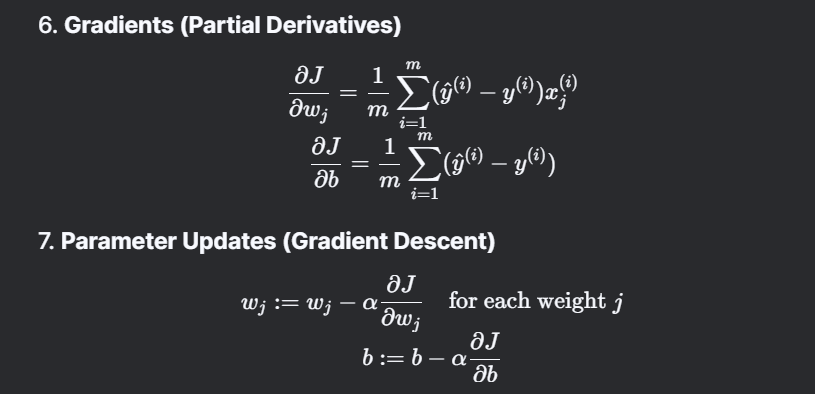